In [1]:
import os
#from osgeo import gdal
import geopandas as gpd

import valenspy as vp
from valenspy._utilities import load_yml
from valenspy.processing.select import select_point
from valenspy.diagnostic.functions import mean_bias, mean_absolute_error, root_mean_square_error, spearman_correlation, perkins_skill_score, time_series_spatial_mean
from valenspy.diagnostic.visualizations import *
from valenspy.processing.regrid import *
from pathlib import Path

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import percentileofscore
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.cm
import math



# define machine name - used for paths of (observational) datasets
machine = 'hortense'

manager = vp.InputManager(machine=machine)

In [2]:
cclm_dir = "/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/hourly/"
cclm_file = "T_2M_hourly_20190722.nc"
wrf_dir = "/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/UCL/WRF_output/"
wrf_file = "WRF_run_urban_T2,V10,U10,PSFC,RAINNC,TH2,Q2,ALBEDO_20190720-20190724.nc"

In [3]:
ds = xr.open_mfdataset(cclm_dir + cclm_file, combine='by_coords')
# ds = ds.assign_coords({"lat":ds.XLAT})
# ds = ds.assign_coords({"lon":ds.XLONG})
ds


<xarray.Dataset> Size: 9MB
Dimensions:       (time: 24, bnds: 2, rlat: 320, rlon: 260)
Coordinates:
  * time          (time) datetime64[ns] 192B 2019-07-22 ... 2019-07-22T23:00:00
    lon           (rlat, rlon) float32 333kB dask.array<chunksize=(320, 260), meta=np.ndarray>
    lat           (rlat, rlon) float32 333kB dask.array<chunksize=(320, 260), meta=np.ndarray>
  * rlon          (rlon) float32 1kB -3.263 -3.237 -3.213 ... 3.162 3.188 3.213
  * rlat          (rlat) float32 1kB -4.012 -3.987 -3.963 ... 3.912 3.938 3.963
    height_2m     float32 4B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    rotated_pole  |S1 1B ...
    T_2M          (time, rlat, rlon) float32 8MB dask.array<chunksize=(24, 320, 260), meta=np.ndarray>
Attributes: (12/14)
    CDI:             Climate Data Interface version 2.3.0 (https://mpimet.mpg...
    Conventions:     CF-1.4
    source:          cosmo6.00_clm2, int2lm3.0_clm1
    institution:     KU Leuven, Leuven, BELGIUM
    title:           BE_28 Ecoclimap Nukleus Transient
    project_id:      CORDEXbe2
    ...              ...
    conventionsURL:  http://www.cfconventions.org/
    contact:         FIEN SERRAS (fien.serras@kuleuven.be)
    references:      http://ees.kuleuven.be/rcs/
    creation_date:   2024-12-03 22:59:44
    history:         Thu Jan 02 17:56:20 2025: cdo mergetime hourly/temp/T_2M...
    CDO:             Climate Data Operators version 2.3.0 (https://mpimet.mpg...

In [4]:
da = ds["T_2M"].sel(time ="2019-07-22T16:00:00")

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/conda_envs/wrf_env/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(49.0, 52.0)

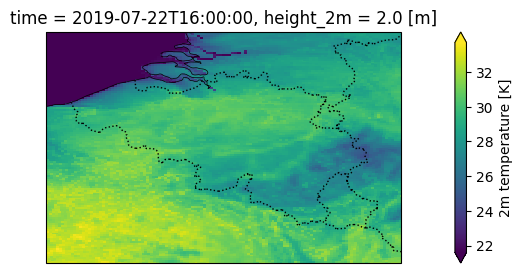

In [5]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 3), subplot_kw={"projection": ccrs.PlateCarree()}
)
da = da-273.15
da.plot(x = "lon", y = "lat", vmin = 21.6, vmax = 33.7)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, color="k")
ax.set_xlim([2.2, 6.8])
ax.set_ylim([49, 52])

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/conda_envs/wrf_env/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: title={'center': '2m temperature (T_2M)'}, xlabel='rotated longitude [degrees]', ylabel='rotated latitude [degrees]'>

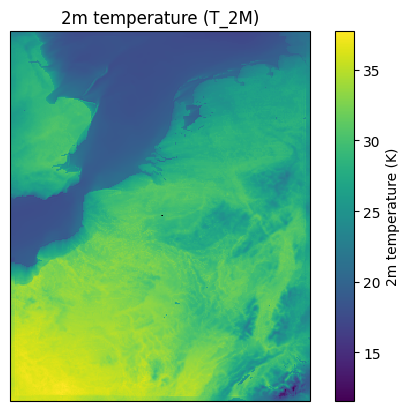

In [6]:
plot_map(da)